# DM2: Project

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
from sklearn.model_selection import train_test_split

from collections import defaultdict

# Data Preparation

In [2]:
#uploading file "tracks.csv"
df_tracks = pd.read_csv('/Users/matteoppa/Projectfma/fma/data/fma_metadata/tracks.csv')

C:\Users\petra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#saving and creating new column names
row_names=np.array(df_tracks)[0]
row_names[0]='track_id'

In [4]:
#replacing names of old columns
df_tracks.set_axis(row_names, axis=1,inplace=True)

In [5]:
#deleting useless rows (wrong columns names)
df_tracks.drop(df_tracks.index[[0,1]], inplace=True)

In [6]:
#checking the result
df_tracks.head()

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [7]:
#uploading file "echonest.csv"
df_echonest = pd.read_csv('echonest.csv')

C:\Users\petra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types.S

In [8]:
#saving and creating new column names
row_names=np.array(df_echonest)[1]
row_names[0]='track_id'

In [9]:
#replacing names of old columns
df_echonest.set_axis(row_names, axis=1,inplace=True)

In [10]:
#selecting and saving useless columns (000,001,..,226)
wrong_columns=df_echonest.columns[26:250]

In [11]:
#deleting useless rows (wrong columns names)
df_echonest.drop(df_echonest.index[[0,1,2]], inplace=True)

In [12]:
#deleting useless columns
df_echonest.drop(wrong_columns, axis=1, inplace=True)

In [13]:
#checking the result
df_echonest.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,album_date,...,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
3,2,0.4166752327,0.6758939853,0.6344762684,0.0106280683,0.1776465712,0.1593100648,165.9220000000,0.5766609880,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
4,3,0.3744077685,0.5286430621,0.8174611317,0.0018511032,0.1058799438,0.4618181276,126.9570000000,0.2692402421,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
5,5,0.0435668989,0.7455658702,0.7014699916,0.0006967990,0.3731433124,0.1245953419,100.2600000000,0.6216612236,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
6,10,0.9516699648,0.6581786543,0.9245251615,0.9654270154,0.1154738842,0.0329852191,111.5620000000,0.9635898919,2008-03-11,...,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000
7,134,0.4522173071,0.5132380502,0.5604099311,0.0194426943,0.0965666940,0.5255193792,114.2900000000,0.8940722715,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000


In [14]:
#joining df_tacks and df_echonest by "track_id" column
df=df_tracks.join(df_echonest.set_index('track_id'), on='track_id')
df.head()

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,artist_discovery_rank,artist_familiarity_rank,artist_hotttnesss_rank,song_currency_rank,song_hotttnesss_rank,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3889898648,0.3867400000,0.4063700000,0.0000000000,0.0000000000
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,2635.0000000000,2544.0000000000,397.0000000000,115691.0000000000,67609.0000000000,0.5573390067,0.6142720000,0.7983870000,0.0051579926,0.3545160000
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#checking all column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 106575
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   track_id                 106574 non-null  object
 1   comments                 106574 non-null  object
 2   date_created             103045 non-null  object
 3   date_released            70294 non-null   object
 4   engineer                 15295 non-null   object
 5   favorites                106574 non-null  object
 6   id                       106574 non-null  object
 7   information              83149 non-null   object
 8   listens                  106574 non-null  object
 9   producer                 18060 non-null   object
 10  tags                     106574 non-null  object
 11  title                    105549 non-null  object
 12  tracks                   106574 non-null  object
 13  type                     100066 non-null  object
 14  active_year_begin   

In [16]:
#saving only good columns
df_resize=df[['comments','date_released','engineer','favorites','listens','producer','tracks','type','active_year_begin','active_year_end','location','name','bit_rate','composer','duration','genre_top','interest','language_code','lyricist','number','publisher']]
df_resize.head()

,comments,comments,comments,date_released,engineer,favorites,favorites,favorites,listens,listens,...,name,bit_rate,composer,duration,genre_top,interest,language_code,lyricist,number,publisher
2,0,0,0,2009-01-05 00:00:00,NaN,4,9,2,6073,1293,...,AWOL,256000,NaN,168,Hip-Hop,4656,en,NaN,3,NaN
3,0,0,0,2009-01-05 00:00:00,NaN,4,9,1,6073,514,...,AWOL,256000,NaN,237,Hip-Hop,1470,en,NaN,4,NaN
4,0,0,0,2009-01-05 00:00:00,NaN,4,9,6,6073,1151,...,AWOL,256000,NaN,206,Hip-Hop,1933,en,NaN,6,NaN
5,0,3,0,2008-02-06 00:00:00,NaN,4,74,178,47632,50135,...,Kurt Vile,192000,Kurt Vile,161,Pop,54881,en,NaN,1,NaN
6,0,2,0,2009-01-06 00:00:00,NaN,2,10,0,2710,361,...,Nicky Cook,256000,NaN,311,NaN,978,en,NaN,3,NaN


In [17]:
#changing name to 'comments'
cols = []
count = 1
for column in df_resize.columns:
    if column == 'comments':
        cols.append(f'comments_{count}')
        count+=1
        continue
    cols.append(column)
df_resize.columns = cols

In [18]:
#changing name to 'favorites'
cols = []
count = 1
for column in df_resize.columns:
    if column == 'favorites':
        cols.append(f'favorites_{count}')
        count+=1
        continue
    cols.append(column)
df_resize.columns = cols

In [19]:
#changing name to 'listens'
cols = []
count = 1
for column in df_resize.columns:
    if column == 'listens':
        cols.append(f'listens_{count}')
        count+=1
        continue
    cols.append(column)
df_resize.columns = cols

In [20]:
#visualizing new dataset
df_resize.head()

,comments_1,comments_2,comments_3,date_released,engineer,favorites_1,favorites_2,favorites_3,listens_1,listens_2,...,name,bit_rate,composer,duration,genre_top,interest,language_code,lyricist,number,publisher
2,0,0,0,2009-01-05 00:00:00,NaN,4,9,2,6073,1293,...,AWOL,256000,NaN,168,Hip-Hop,4656,en,NaN,3,NaN
3,0,0,0,2009-01-05 00:00:00,NaN,4,9,1,6073,514,...,AWOL,256000,NaN,237,Hip-Hop,1470,en,NaN,4,NaN
4,0,0,0,2009-01-05 00:00:00,NaN,4,9,6,6073,1151,...,AWOL,256000,NaN,206,Hip-Hop,1933,en,NaN,6,NaN
5,0,3,0,2008-02-06 00:00:00,NaN,4,74,178,47632,50135,...,Kurt Vile,192000,Kurt Vile,161,Pop,54881,en,NaN,1,NaN
6,0,2,0,2009-01-06 00:00:00,NaN,2,10,0,2710,361,...,Nicky Cook,256000,NaN,311,NaN,978,en,NaN,3,NaN


In [21]:
#converting float columns
float_columns=['comments_1','comments_2','comments_3','favorites_1','favorites_2','favorites_3', 'listens_1','listens_2','tracks','bit_rate', 'duration','interest','number']

for i in float_columns:
    df_resize[i] = df_resize[i].astype(float)

<ipython-input-21-0b0b162809b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resize[i] = df_resize[i].astype(float)


In [22]:
#splitting into train and test set
train, test = train_test_split(df_resize, test_size=0.25, random_state=42, shuffle=True)

In [23]:
#dimension of train
train.shape

(79930, 26)

In [24]:
#dimension of test
test.shape

(26644, 26)

In [25]:
#how many null values(NaN)? in %
train.isnull().sum()/len(train)*100

comments_1            0.000000
comments_2            0.000000
comments_3            0.000000
date_released        34.099837
engineer             85.599900
favorites_1           0.000000
favorites_2           0.000000
favorites_3           0.000000
listens_1             0.000000
listens_2             0.000000
producer             83.017640
tracks                0.000000
type                  6.130364
active_year_begin    78.700113
active_year_end      94.963093
location             34.182410
name                  0.000000
bit_rate              0.000000
composer             96.563243
duration              0.000000
genre_top            53.505567
interest              0.000000
language_code        85.921431
lyricist             99.705993
number                0.000000
publisher            98.822720
dtype: float64

In [26]:
#deleting variables with more than 60% of null values (we need genre_top, we will save it)
train.drop(['engineer','producer','active_year_begin', 'active_year_end','composer','language_code','lyricist','publisher'], inplace=True, axis=1)

C:\Users\petra\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#coverting in datetime columns with date
train['date_released'] = pd.to_datetime(train.date_released)
train['date_released'].head()

<ipython-input-27-eb3395763255>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_released'] = pd.to_datetime(train.date_released)


65420          NaT
11917   2009-09-19
68632   2014-04-12
8334           NaT
14280          NaT
Name: date_released, dtype: datetime64[ns]

In [28]:
#changing the format of date_released and creating new columns: year, month and day_of_week
train['date_released'] = train['date_released'].astype('datetime64[ns]')
train['date_released'].head()
train['year'] = pd.DatetimeIndex(train['date_released']).year
train['month'] = pd.DatetimeIndex(train['date_released']).month
train['day_of_week'] = pd.DatetimeIndex(train['date_released']).dayofweek+1 #0=Monday

<ipython-input-28-928b200af126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date_released'] = train['date_released'].astype('datetime64[ns]')
<ipython-input-28-928b200af126>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['year'] = pd.DatetimeIndex(train['date_released']).year
<ipython-input-28-928b200af126>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [29]:
#creating a new column (weekend) based on day_of_week. We are expecting a correlation
train['weekend'] = [1 if w > 5 else 0 for w in train['day_of_week']]

<ipython-input-29-db1d59b1ed2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekend'] = [1 if w > 5 else 0 for w in train['day_of_week']]


In [30]:
#function to recognize season
def season(s):
    if 80 <= s <= 172:
        return 'spring'
    elif 173 <= s <= 265:
        return 'summer'
    elif 266 <= s <= 355:
        return 'autumn'
    return 'winter'

In [31]:
#creating a new column (season) based on date_released. We are expecting a correlation with date_released or month
train['season'] = [season(d) for d in pd.DatetimeIndex(train['date_released']).dayofyear]

<ipython-input-31-e43a0c0c972a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['season'] = [season(d) for d in pd.DatetimeIndex(train['date_released']).dayofyear]


In [32]:
#creating and visualizing the one_hot_encoding format of season
dfX = pd.get_dummies(train[[c for c in train.columns if c == 'season']], prefix_sep='=')
dfX.head()

,season=autumn,season=spring,season=summer,season=winter
65420,0,0,0,1
11917,0,0,1,0
68632,0,1,0,0
8334,0,0,0,1
14280,0,0,0,1


In [33]:
#attaching the one_hot_encoding format columns
train = pd.concat([train,dfX], axis=1)
train.head()

,comments_1,comments_2,comments_3,date_released,favorites_1,favorites_2,favorites_3,listens_1,listens_2,tracks,...,number,year,month,day_of_week,weekend,season,season=autumn,season=spring,season=summer,season=winter
65420,0.0,0.0,0.0,NaT,0.0,0.0,0.0,12106.0,897.0,11.0,...,7.0,NaN,NaN,NaN,0,winter,0,0,0,1
11917,0.0,1.0,0.0,2009-09-19,2.0,6.0,5.0,20142.0,2817.0,7.0,...,7.0,2009.0,9.0,6.0,1,summer,0,0,1,0
68632,0.0,0.0,0.0,2014-04-12,0.0,0.0,0.0,4449.0,341.0,10.0,...,8.0,2014.0,4.0,6.0,1,spring,0,1,0,0
8334,0.0,0.0,0.0,NaT,0.0,0.0,1.0,1050.0,234.0,13.0,...,6.0,NaN,NaN,NaN,0,winter,0,0,0,1
14280,1.0,2.0,0.0,NaT,1.0,24.0,0.0,9585.0,275.0,21.0,...,10.0,NaN,NaN,NaN,0,winter,0,0,0,1


<AxesSubplot:>

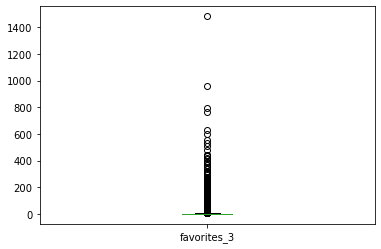

In [34]:
#boxplot visualization of favorites_3 to choice intervals
train.boxplot(column = ['favorites_3'], grid = False)

In [35]:
#quatile study to choice intervals
train.favorites_3.quantile([0.25,0.5,0.75])

0.25    0.0
0.50    1.0
0.75    3.0
Name: favorites_3, dtype: float64

In [36]:
#function to have intervals
def liked(h):
    if h < 1.0:
        return 0
    if h < 10.0:
        return 1
    elif h < 50.0:
        return 2
    elif h < 100.0:
        return 3
    return 4

In [37]:
#creating a new column, favorites_3 descripted by intervals, we will use this to target variable
train['liked'] = [liked(d) for d in train['favorites_3']]

<AxesSubplot:>

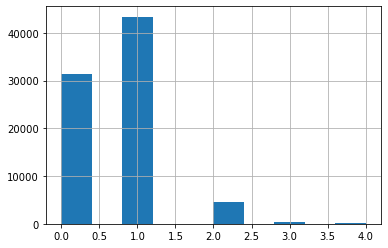

In [38]:
#distribution of liked to visualize intervals 
train['liked'].hist()

In [39]:
#values of simple correlation
train.corr()

,comments_1,comments_2,comments_3,favorites_1,favorites_2,favorites_3,listens_1,listens_2,tracks,bit_rate,...,number,year,month,day_of_week,weekend,season=autumn,season=spring,season=summer,season=winter,liked
comments_1,1.000000,0.106929,0.127551,0.358901,0.085490,0.122625,0.808114,0.181459,0.340072,-0.008387,...,0.086556,0.026022,0.047233,-0.006713,-0.032475,0.059651,-0.001100,-0.015235,-0.031817,0.119362
comments_2,0.106929,1.000000,0.105424,0.453374,0.897554,0.342091,0.211597,0.331160,-0.015334,0.064945,...,-0.042358,0.043064,-0.020788,-0.004797,-0.033385,-0.044287,-0.007845,-0.026876,0.056050,0.309999
comments_3,0.127551,0.105424,1.000000,0.158327,0.082926,0.503493,0.150022,0.382070,-0.001858,-0.004078,...,-0.022617,0.001366,0.013078,-0.012419,-0.010317,0.002885,-0.004799,-0.003258,0.003698,0.161900
favorites_1,0.358901,0.453374,0.158327,1.000000,0.421793,0.464533,0.437910,0.418766,0.166113,0.023629,...,0.068934,-0.018673,0.013347,-0.017929,-0.023538,0.002238,0.003791,0.008097,-0.009939,0.422607
favorites_2,0.085490,0.897554,0.082926,0.421793,1.000000,0.313495,0.208294,0.310532,-0.011427,0.070463,...,-0.045461,0.064129,-0.023814,-0.022831,-0.039391,-0.047704,0.001310,-0.035152,0.057358,0.310893
favorites_3,0.122625,0.342091,0.503493,0.464533,0.313495,1.000000,0.211238,0.810133,-0.029300,0.012591,...,-0.042548,0.001585,0.009369,-0.021352,-0.025275,-0.013410,-0.010482,0.001790,0.016225,0.460107
listens_1,0.808114,0.211597,0.150022,0.437910,0.208294,0.211238,1.000000,0.318982,0.243728,-0.019270,...,0.038396,0.028616,0.076193,-0.021189,-0.039328,0.061423,-0.026602,-0.013952,-0.015053,0.199140
listens_2,0.181459,0.331160,0.382070,0.418766,0.310532,0.810133,0.318982,1.000000,-0.018633,0.019023,...,-0.048946,0.033416,0.028944,-0.020607,-0.029307,-0.004227,-0.016288,0.000616,0.014709,0.422231
tracks,0.340072,-0.015334,-0.001858,0.166113,-0.011427,-0.029300,0.243728,-0.018633,1.000000,0.038931,...,0.561155,0.063235,-0.075408,0.069976,-0.008004,-0.012942,-0.011519,-0.022279,0.033045,-0.083318
bit_rate,-0.008387,0.064945,-0.004078,0.023629,0.070463,0.012591,-0.019270,0.019023,0.038931,1.000000,...,0.045430,0.299498,0.042508,0.001153,0.024471,0.052609,0.045011,0.029926,-0.091693,0.036525


In [40]:
#values of spearman correlation
train.corr(method='spearman')

,comments_1,comments_2,comments_3,favorites_1,favorites_2,favorites_3,listens_1,listens_2,tracks,bit_rate,...,number,year,month,day_of_week,weekend,season=autumn,season=spring,season=summer,season=winter,liked
comments_1,1.000000,0.150653,0.086121,0.450838,0.130534,0.199648,0.411021,0.176487,0.271905,0.036773,...,0.097571,-0.011405,-0.002578,0.007161,-0.004624,0.018997,0.048234,0.006915,-0.054181,0.179655
comments_2,0.150653,1.000000,0.082609,0.215725,0.638613,0.272027,0.233693,0.267538,0.018477,0.031905,...,-0.030437,-0.030810,-0.000347,0.014108,-0.010773,-0.030307,-0.005299,-0.039127,0.052424,0.238689
comments_3,0.086121,0.082609,1.000000,0.090722,0.075948,0.157749,0.091278,0.144232,-0.028966,-0.007501,...,-0.040993,-0.011663,0.016543,-0.016504,-0.012543,0.000977,-0.002667,-0.004305,0.004205,0.144954
favorites_1,0.450838,0.215725,0.090722,1.000000,0.281399,0.395716,0.513726,0.300213,0.278370,0.052552,...,0.084556,-0.079702,0.008934,-0.022046,0.007261,0.025049,0.052979,0.013897,-0.066819,0.351107
favorites_2,0.130534,0.638613,0.075948,0.281399,1.000000,0.360861,0.282289,0.331121,0.013917,0.029635,...,-0.027757,-0.056941,0.006700,-0.011325,-0.022615,-0.034356,-0.009130,-0.028150,0.050710,0.317817
favorites_3,0.199648,0.272027,0.157749,0.395716,0.360861,1.000000,0.408847,0.644651,-0.117391,0.035067,...,-0.140249,-0.016787,0.047131,-0.051411,-0.043892,-0.004224,-0.004615,-0.003148,0.008612,0.917184
listens_1,0.411021,0.233693,0.091278,0.513726,0.282289,0.408847,1.000000,0.624027,0.483905,0.109450,...,0.206754,0.196293,0.067682,-0.006540,-0.016550,0.032648,0.009527,0.014957,-0.040789,0.353703
listens_2,0.176487,0.267538,0.144232,0.300213,0.331121,0.644651,0.624027,1.000000,-0.144727,0.051277,...,-0.153562,0.169179,0.111454,-0.045549,-0.045804,0.028635,-0.023379,-0.002966,-0.001284,0.560057
tracks,0.271905,0.018477,-0.028966,0.278370,0.013917,-0.117391,0.483905,-0.144727,1.000000,0.062356,...,0.484103,0.041622,-0.036000,0.025249,0.012554,0.000567,0.022492,-0.005632,-0.013256,-0.104777
bit_rate,0.036773,0.031905,-0.007501,0.052552,0.029635,0.035067,0.109450,0.051277,0.062356,1.000000,...,0.042709,0.357492,0.049888,0.004604,0.023388,0.052012,0.036941,0.021102,-0.079268,0.040442


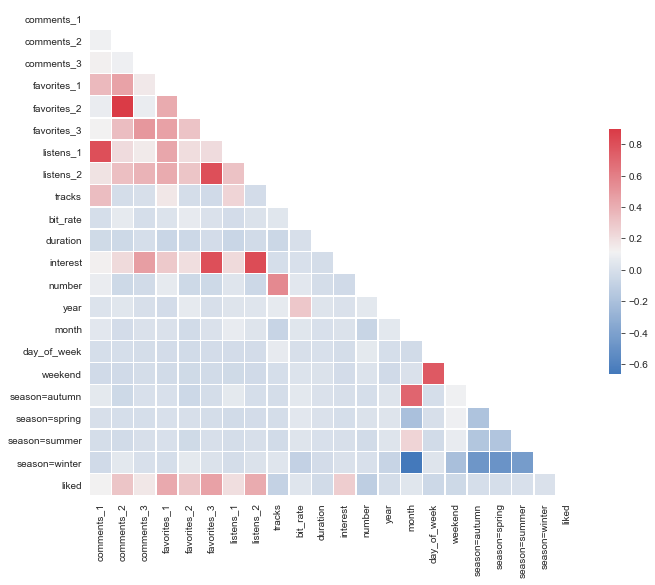

In [41]:
#visualization of simple correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited
l = train.corr()

# Split list
n = 6
data = [l[i:i + n] for i in range(0, len(l), n)]

# A dataframe
df = pd.DataFrame(train)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = True)

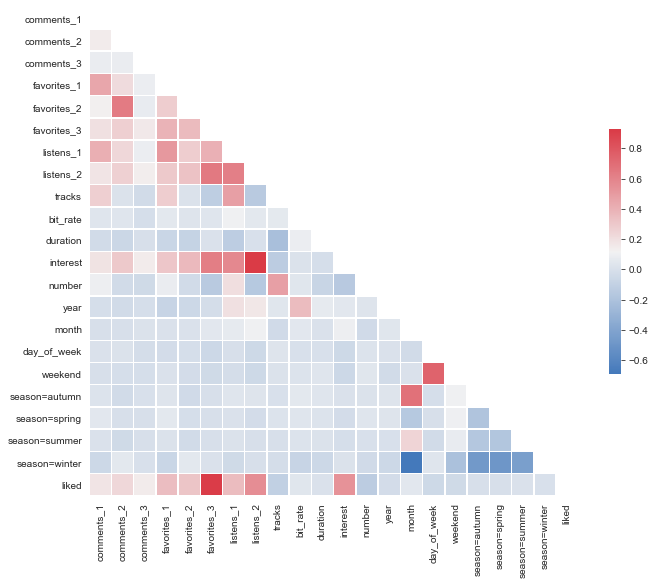

In [42]:
#visualization of spearman correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# A list with your data slightly edited
l = train.corr(method='spearman')

# Split list
n = 6
data = [l[i:i + n] for i in range(0, len(l), n)]

# A dataframe
df = pd.DataFrame(train)

def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    df = df.corr(method='spearman')

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = True)

In [43]:
#checking train set
train.head()

,comments_1,comments_2,comments_3,date_released,favorites_1,favorites_2,favorites_3,listens_1,listens_2,tracks,...,year,month,day_of_week,weekend,season,season=autumn,season=spring,season=summer,season=winter,liked
65420,0.0,0.0,0.0,NaT,0.0,0.0,0.0,12106.0,897.0,11.0,...,NaN,NaN,NaN,0,winter,0,0,0,1,0
11917,0.0,1.0,0.0,2009-09-19,2.0,6.0,5.0,20142.0,2817.0,7.0,...,2009.0,9.0,6.0,1,summer,0,0,1,0,1
68632,0.0,0.0,0.0,2014-04-12,0.0,0.0,0.0,4449.0,341.0,10.0,...,2014.0,4.0,6.0,1,spring,0,1,0,0,0
8334,0.0,0.0,0.0,NaT,0.0,0.0,1.0,1050.0,234.0,13.0,...,NaN,NaN,NaN,0,winter,0,0,0,1,1
14280,1.0,2.0,0.0,NaT,1.0,24.0,0.0,9585.0,275.0,21.0,...,NaN,NaN,NaN,0,winter,0,0,0,1,0


In [44]:
#dropping columns with highest correlation (0.75)
train.drop(['comments_1','comments_2','interest', 'listens_2','month','date_released','favorites_3','season','day_of_week'], inplace=True, axis=1)

In [45]:
#rechecking the train set
train.head()

,comments_3,favorites_1,favorites_2,listens_1,tracks,type,location,name,bit_rate,duration,genre_top,number,year,weekend,season=autumn,season=spring,season=summer,season=winter,liked
65420,0.0,0.0,0.0,12106.0,11.0,Album,NaN,Filipe Guimarães,320000.0,320.0,NaN,7.0,NaN,0,0,0,0,1,0
11917,0.0,2.0,6.0,20142.0,7.0,Live Performance,"Brooklyn, NY",Clay Ross and Matuto,256000.0,214.0,NaN,7.0,2009.0,1,0,0,1,0,1
68632,0.0,0.0,0.0,4449.0,10.0,Album,"New Orleans, LA",Bipolaroid,192000.0,139.0,NaN,8.0,2014.0,1,0,1,0,0,0
8334,0.0,0.0,0.0,1050.0,13.0,Album,NaN,Sote,320000.0,323.0,NaN,6.0,NaN,0,0,0,0,1,1
14280,0.0,1.0,24.0,9585.0,21.0,Album,"Chicago, IL 60608",U Can Unlearn Guitar,192000.0,134.0,NaN,10.0,NaN,0,0,0,0,1,0


In [46]:
#what NaN values we have to replace?
train.isnull().sum()/len(train)*100

comments_3        0.000000
favorites_1       0.000000
favorites_2       0.000000
listens_1         0.000000
tracks            0.000000
type              6.130364
location         34.182410
name              0.000000
bit_rate          0.000000
duration          0.000000
genre_top        53.505567
number            0.000000
year             34.099837
weekend           0.000000
season=autumn     0.000000
season=spring     0.000000
season=summer     0.000000
season=winter     0.000000
liked             0.000000
dtype: float64

In [47]:
#replacing NaN values of type
train['type'].fillna(train['type'].mode()[0], inplace=True)

In [48]:
#replacing NaN values of location
train['location'].fillna('Unknown', inplace=True)

In [49]:
#NOT USED
#replacing NaN values of genre_top
#train['genre_top'].fillna(train['genre_top'].mode()[0], inplace=True) #Soffermarsi di più?

In [50]:
#Visualizing the distribution of genre_top based on type 
#(not liked beacuse it's our target value and not year, because type is more stable)
train.groupby('type').genre_top.value_counts()

type              genre_top          
Album             Experimental           7333
                  Rock                   6970
                  Electronic             6657
                  Hip-Hop                2589
                  Pop                    1627
                  Folk                   1618
                  Instrumental           1520
                  Classical               792
                  International           654
                  Jazz                    361
                  Old-Time / Historic     346
                  Spoken                  140
                  Soul-RnB                101
                  Country                  89
                  Blues                    62
                  Easy Listening           20
Live Performance  Rock                   1317
                  Experimental            356
                  International           301
                  Folk                    144
                  Electronic              

In [51]:
#replacing NaN values of genre_top with values based on the distribution of type
print(train['genre_top'].mode())
for i in range(len(train)):
    if pd.isnull(train.iloc[i,10]):
        if train.iloc[i,5]=='Album':
            train.iloc[i,10]='Experimental'
        elif train.iloc[i,5]=='Live Performance':
            train.iloc[i,10]='Rock'
        elif train.iloc[i,5]=='Radio Program':
            train.iloc[i,10]='Rock'
        elif train.iloc[i,5]=='Single Tracks':
            train.iloc[i,10]='Electronic'
        elif train.iloc[i,5]=='Contest':
             train.iloc[i,10]='Rock'

0    Rock
dtype: object


In [52]:
#replacing NaN values of year
mean_year=round(train['year'].mean())
train['year'].fillna(mean_year, inplace=True)

In [53]:
#checking
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79930 entries, 65420 to 15797
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   comments_3     79930 non-null  float64
 1   favorites_1    79930 non-null  float64
 2   favorites_2    79930 non-null  float64
 3   listens_1      79930 non-null  float64
 4   tracks         79930 non-null  float64
 5   type           79930 non-null  object 
 6   location       79930 non-null  object 
 7   name           79930 non-null  object 
 8   bit_rate       79930 non-null  float64
 9   duration       79930 non-null  float64
 10  genre_top      79930 non-null  object 
 11  number         79930 non-null  float64
 12  year           79930 non-null  float64
 13  weekend        79930 non-null  int64  
 14  season=autumn  79930 non-null  uint8  
 15  season=spring  79930 non-null  uint8  
 16  season=summer  79930 non-null  uint8  
 17  season=winter  79930 non-null  uint8  
 18  li

In [54]:
#rechecking number of NaN values
train.isnull().sum()/len(train)*100

comments_3       0.0
favorites_1      0.0
favorites_2      0.0
listens_1        0.0
tracks           0.0
type             0.0
location         0.0
name             0.0
bit_rate         0.0
duration         0.0
genre_top        0.0
number           0.0
year             0.0
weekend          0.0
season=autumn    0.0
season=spring    0.0
season=summer    0.0
season=winter    0.0
liked            0.0
dtype: float64

In [55]:
#studing distribution

In [56]:
#Which variables have a wide range of values? It comes from the distribution study
#deleting columns with a lot of label, they can complicate the classification
train.drop(['location','name'], inplace=True, axis=1)

In [57]:
#library for scaling
from sklearn.preprocessing import MinMaxScaler

In [58]:
#creating the scaler
scaler=MinMaxScaler()

In [59]:
#scaling integer or float values (not all)
#INSERIRE DENTRO to_discard I NOMI DELLE COLONNE DA NON NORMALIZZARE
to_discard=['type','genre_top','liked']
for col in train.columns:
    if col not in to_discard:
        actualColumn=train[col].values.reshape(-1, 1)
        newColumn=scaler.fit_transform(actualColumn)
        train[col]=newColumn
train

,comments_3,favorites_1,favorites_2,listens_1,tracks,type,bit_rate,duration,genre_top,number,year,weekend,season=autumn,season=spring,season=summer,season=winter,liked
65420,0.0,0.016129,0.001037,0.003397,0.018377,Album,0.714286,0.017439,Experimental,0.027451,0.915966,0.0,0.0,0.0,0.0,1.0,0
11917,0.0,0.048387,0.007261,0.005651,0.012251,Live Performance,0.571430,0.011662,Rock,0.027451,0.899160,1.0,0.0,0.0,1.0,0.0,1
68632,0.0,0.016129,0.001037,0.001249,0.016845,Album,0.428573,0.007575,Experimental,0.031373,0.941176,1.0,0.0,1.0,0.0,0.0,0
8334,0.0,0.016129,0.001037,0.000295,0.021440,Album,0.714286,0.017602,Experimental,0.023529,0.915966,0.0,0.0,0.0,0.0,1.0,1
14280,0.0,0.032258,0.025934,0.002689,0.033691,Album,0.428573,0.007302,Experimental,0.039216,0.915966,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54888,0.0,0.129032,0.814315,0.108406,0.055130,Album,0.714286,0.010027,Experimental,0.000000,0.932773,0.0,0.0,1.0,0.0,0.0,1
76822,0.0,0.016129,0.017635,0.006112,0.093415,Album,0.714286,0.019019,Experimental,0.215686,0.949580,0.0,0.0,0.0,0.0,1.0,0
103696,0.0,0.016129,0.002075,0.000223,0.070444,Album,0.571430,0.003270,Experimental,0.050980,0.915966,0.0,0.0,0.0,0.0,1.0,0
862,0.0,0.016129,0.006224,0.000567,0.010720,Album,0.571430,0.005450,Rock,0.015686,0.899160,0.0,0.0,0.0,0.0,1.0,1


In [60]:
#library for labelling
from sklearn.preprocessing import LabelEncoder

In [61]:
#labelling string values
label_encoders = dict()
column2encode = ['type', 'genre_top']

for col in column2encode:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders[col] = le

In [62]:
#rechecking train set
train.head()

,comments_3,favorites_1,favorites_2,listens_1,tracks,type,bit_rate,duration,genre_top,number,year,weekend,season=autumn,season=spring,season=summer,season=winter,liked
65420,0.0,0.016129,0.001037,0.003397,0.018377,0,0.714286,0.017439,5,0.027451,0.915966,0.0,0.0,0.0,0.0,1.0,0
11917,0.0,0.048387,0.007261,0.005651,0.012251,2,0.571430,0.011662,13,0.027451,0.899160,1.0,0.0,0.0,1.0,0.0,1
68632,0.0,0.016129,0.001037,0.001249,0.016845,0,0.428573,0.007575,5,0.031373,0.941176,1.0,0.0,1.0,0.0,0.0,0
8334,0.0,0.016129,0.001037,0.000295,0.021440,0,0.714286,0.017602,5,0.023529,0.915966,0.0,0.0,0.0,0.0,1.0,1
14280,0.0,0.032258,0.025934,0.002689,0.033691,0,0.428573,0.007302,5,0.039216,0.915966,0.0,0.0,0.0,0.0,1.0,0
